In [2]:
import pandas as pd
import numpy as np

In [3]:
courses = pd.read_csv("courses.csv")
students = pd.read_csv("students.csv")
nov = pd.read_csv("reg-month1.csv")
dec = pd.read_csv("reg-month2.csv")

matches = pd.read_csv("matches.csv")
delivery = pd.read_csv("deliveries.csv")

In [ ]:
students

In [74]:
#pd.concat
#ignore_index
#df.append
#multiindex -> fetch using loc
#concat dataframes horizontally

In [29]:
# to ignore repeat index used (ignore_index =) 
regs = pd.concat([nov,dec],ignore_index=True) #joined vertically

In [19]:
# last thing can do with the help of ``append`` operation as well
regs = nov.append(dec,ignore_index=True)

In [72]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
# Multiindex dataframes
# a dataset where more than one index available

In [26]:
#fetched ``nov`` month data
# 1st banda 
multi.loc[('Nov'),0]

student_id    23
course_id      1
Name: (Nov, 0), dtype: int64

In [29]:
#fetched ``dec`` month data
# 5th banda 
multi.loc[('Dec',4)]

student_id    14
course_id      9
Name: (Dec, 4), dtype: int64

**if want to concat ``horizontally``**
- even if no. of columns not equal in two df

In [43]:
concat_rows = pd.concat([nov,dec],axis=1)

# **``Merge``**

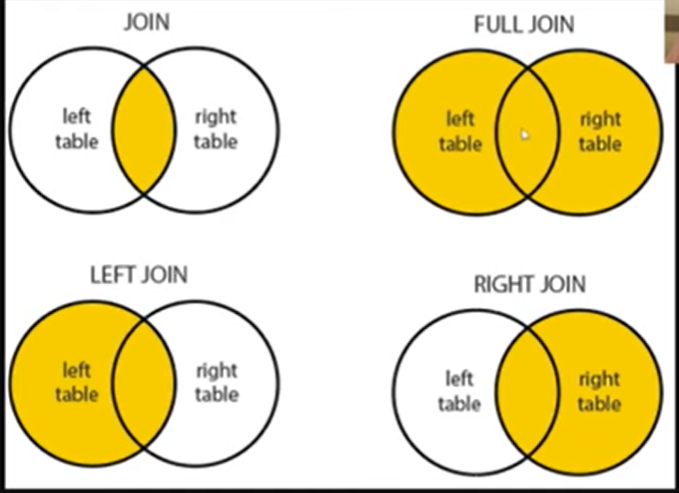

In [70]:
# inner join

# left_table.merge(right_table,how='join_performed',on='common_cols')
inner = students.merge(regs,how='inner',on='student_id')

In [85]:
# left join
left = courses.merge(regs,how='left',on='course_id')

In [84]:
# right join

#make_df
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})
students = pd.concat([students,temp_df],ignore_index=True)
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [86]:
#now right_join
right = students.merge(regs ,how='right',on='student_id')

In [94]:
# outer join or union in sql
# join both the dataframes irrespective of
# the fact that whether they are matching or
# not on some common columns
full_join = students.merge(regs,how='outer',on='student_id').tail(10)

In [115]:
# 1. find total revenue generated
total_revenue = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total_revenue

154247

***important***

In [4]:
# 2. find month by month revenue
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df.merge(courses,how='inner',on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [144]:
# 3. print the registration table
# cols -> student_name -> course -> price

In [143]:
print("regs table\n",regs.head(2))
print("\n")
print("courses table\n",courses.head(2))
print("\n")
print("students table\n",students.head(2))

regs table
    student_id  course_id
0          23          1
1          15          5


courses table
    course_id course_name  price
0          1      python   2499
1          2         sql   3499


students table
    student_id           name  partner
0           1  Kailash Harjo       23
1           2    Esha Butala        1


In [225]:
mask= regs.merge(courses,how='right',left_on='course_id',right_on='course_id').merge(students,how='left',left_on='student_id',right_on='student_id')
mask[mask['student_id'].isnull()]['course_id','course_name',''].values

array(['Numpy', 'C++'], dtype=object)

In [152]:
#   three - merges happened
temp = students.merge(regs,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]
temp.shape

(50, 3)

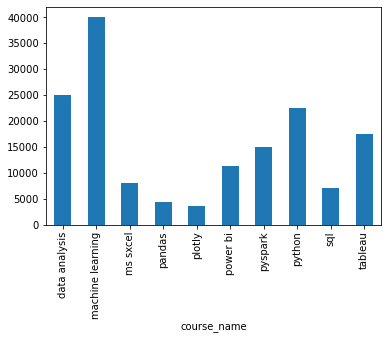

In [222]:
# 4. plot bar chart for course/revenue 
price  =  regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind = 'bar');

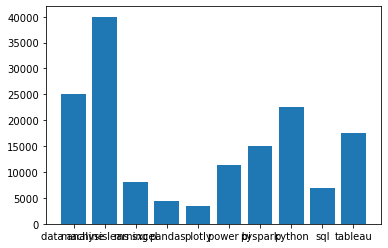

In [223]:
# or
import matplotlib.pyplot as plt
price  =  regs.merge(courses,on='course_id').groupby('course_name')['price'].sum()
x = price.index
y = price.values
plt.bar(x,y);

In [196]:
# 5. find students who enrolled in both the months
import numpy as np
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

#OR
OR= np.unique(nov.merge(dec,on='student_id')['student_id'].values,)
#students[students['student_id'].isin(OR)]

In [193]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [31]:
# 6 find course that got no enrollment
#courses['course_id']
#regs['course_id']
course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


https://byjus.com/maths/difference-of-sets/

In [45]:
# 7. find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)].shape[0]

#inprecentage
(10/students.shape[0])*100

35.714285714285715

**``self_join``**

In [57]:
# 8.print student name -> partner name for all enrolled students
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


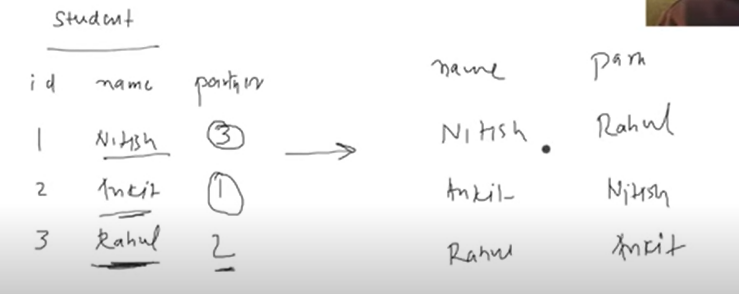

In [71]:
# 9 . find top 3 students who did most number of enrollments
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

In [86]:
# 10. find top 3 students who spent most amount of money on courses
amount = students.merge(regs,on='student_id')
amount.merge(courses,on='course_id').sort_values(by='name',ascending='False').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [88]:
# alternate syntax for `merge`
al = pd.merge(students,regs,how='inner',on='student_id')

In [105]:
# IPL Problems

# find top 3 stadiums with highest sixes/match ratio means
# per match sixes


# find orange cap holder of all the seasons

In [93]:
temp_df = matches.merge(delivery,left_on='id',right_on='match_id')

In [96]:
six_df = temp_df[temp_df['batsman_runs'] == 6]

In [117]:
# stadium -> sixes
si = six_df['venue'].value_counts()
# or using groupby
num_6 = six_df.groupby('venue')['venue'].count()

In [101]:
num_matches = matches['venue'].value_counts()

In [104]:
(num_6/num_matches).sort_values(ascending=False).head(3)

Holkar Cricket Stadium     17.600000
M Chinnaswamy Stadium      13.227273
Sharjah Cricket Stadium    12.666667
Name: venue, dtype: float64

In [106]:
# find orange cap holder of all the seasons
# a person who made highest run a particular season

In [128]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
